In [36]:
# Import dependencies
# Load and read data file. Store as Pandas DataFrame
# Get API
from requests import get
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from api_keys import asos_key


data_to_load = "myntra_products_catalog.csv"
fashion_data = pd.read_csv(data_to_load)
fashion_data


url = "https://asos2.p.rapidapi.com/v2/auto-complete" 

headers = {
    "X-RapidAPI-Key": asos_key,
    "X-RapidAPI-Host": "asos2.p.rapidapi.com"
}


In [3]:
# Function that takes a search term, store, and country as input retunrs the number of results for each searach term
def autocomplete_viz(search_term, store, country):

    querystring = {"q": search_term, "store": store, "country": country}

    autocomplete_response = get(url, headers=headers, params=querystring).json()
    
    suggestions = autocomplete_response["suggestionGroups"][0]["suggestions"]
    
    search_terms, number_results = [], []
    for suggestion in suggestions:
        search_terms.append(suggestion["searchTerm"])
        number_results.append(suggestion["numberOfResults"])
    
    return sum(number_results)


In [4]:
# Executing defined function for each color/location/store combination

us_pink = autocomplete_viz("pink", "US", "US")
us_blue = autocomplete_viz("blue", "US", "US")
us_green = autocomplete_viz("green", "US", "US")
us_black = autocomplete_viz("black", "US", "US")
us_white = autocomplete_viz("white", "US", "US")

fr_pink = autocomplete_viz("rose", "FR", "FR")
fr_blue = autocomplete_viz("bleu", "FR", "FR")
fr_green = autocomplete_viz("verte", "FR", "FR")
fr_black = autocomplete_viz("noir", "FR", "FR")
fr_white = autocomplete_viz("blanc", "FR", "FR")

es_pink = autocomplete_viz("rosa", "ES", "ES")
es_blue = autocomplete_viz("azul", "ES", "ES")
es_green = autocomplete_viz("verde", "ES", "ES")
es_black = autocomplete_viz("negro", "ES", "ES")
es_white = autocomplete_viz("blanco", "ES", "ES")

de_pink = autocomplete_viz("rosa", "DE", "DE")
de_blue = autocomplete_viz("blau", "DE", "DE")
de_green = autocomplete_viz("grun", "DE", "DE")
de_black = autocomplete_viz("schwarz", "DE", "DE")
de_white = autocomplete_viz("weiß", "DE", "DE")

it_pink = autocomplete_viz("rosa", "IT", "IT")
it_blue = autocomplete_viz("blu", "IT", "IT")
it_green = autocomplete_viz("verde", "IT", "IT")
it_black = autocomplete_viz("nero", "IT", "IT")
it_white = autocomplete_viz("bianco", "IT", "IT")

au_pink = autocomplete_viz("pink", "AU", "AU")
au_blue = autocomplete_viz("blue", "AU", "AU")
au_green = autocomplete_viz("green", "AU", "AU")
au_black = autocomplete_viz("black", "AU", "AU")
au_white = autocomplete_viz("white", "AU", "AU")

In [9]:
colors_df = pd.DataFrame({"Pink":[us_pink, fr_pink, es_pink, de_pink, it_pink, au_pink], "Blue":[us_blue, fr_blue, es_blue, de_blue, it_blue, au_blue], "Green":[us_green, fr_green, es_green, de_green, it_green, au_green],"Black":[us_black, fr_black, es_black, de_black, it_black, au_black], "White":[us_white, fr_white, es_white, de_white, it_white, au_white],})
colors_df

,Pink,Blue,Green,Black,White
0,21620,19002,28927,15408,20357
1,29446,17101,13820,19494,19831
2,22867,7610,10264,16348,17133
3,14030,19548,17854,3992,1148
4,27766,32709,19359,16210,18987
5,16592,24527,14847,15438,13392


In [11]:
pink_mean = colors_df["Pink"].mean()
blue_mean = colors_df["Blue"].mean()
green_mean = colors_df["Green"].mean()
black_mean = colors_df["Black"].mean()
white_mean = colors_df["White"].mean()

In [12]:
colors_agg = colors_df.agg(["mean", "median", "var", "std", "sem"])
colors_agg

,Pink,Blue,Green,Black,White
mean,2.205350e+04,2.008283e+04,1.751183e+04,1.448167e+04,1.514133e+04
median,2.224350e+04,1.927500e+04,1.635050e+04,1.582400e+04,1.806000e+04
var,3.646719e+07,6.901757e+07,4.141944e+07,2.867992e+07,5.336512e+07
std,6.038807e+03,8.307681e+03,6.435794e+03,5.355364e+03,7.305143e+03
sem,2.465333e+03,3.391597e+03,2.627402e+03,2.186318e+03,2.982312e+03


(0.0, 35000.0)

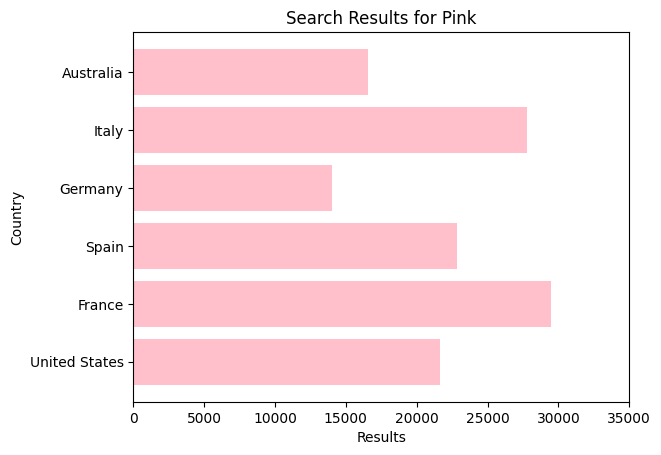

In [13]:
# Plotting the number of results per country for the trend color pink
country = ["United States", "France", "Spain", "Germany", "Italy","Australia"]
results = [us_pink, fr_pink, es_pink, de_pink, it_pink, au_pink]
plt.barh(country, results, color = "pink")
plt.title("Search Results for Pink")
plt.xlabel("Results")
plt.ylabel("Country")
plt.xlim(0, 35000)

(0.0, 35000.0)

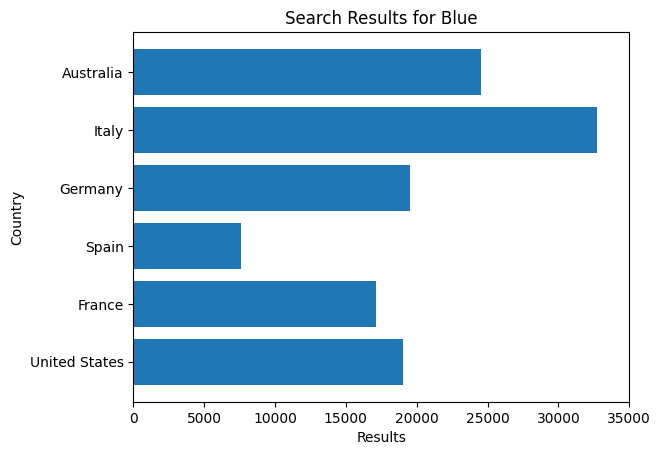

In [14]:
# Plotting the number of results per country for the trend color blue
country = ["United States", "France", "Spain", "Germany", "Italy","Australia"]
results = [us_blue, fr_blue, es_blue, de_blue, it_blue, au_blue]
plt.barh(country, results)
plt.title("Search Results for Blue")
plt.xlabel("Results")
plt.ylabel("Country")
plt.xlim(0, 35000)

(0.0, 35000.0)

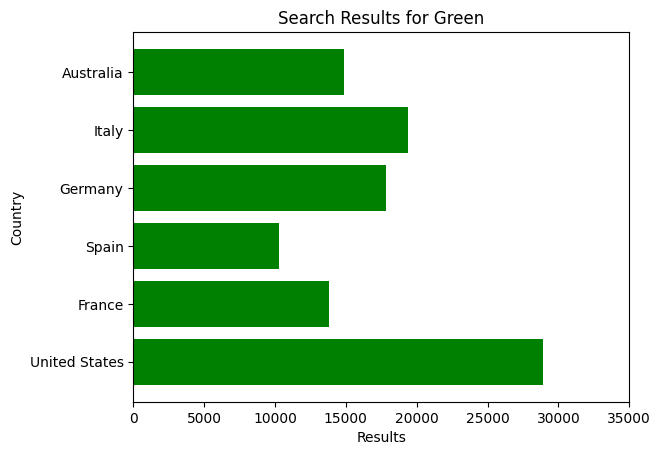

In [15]:
# Plotting the number of results per country for the trend color green
country = ["United States", "France", "Spain", "Germany", "Italy","Australia"]
results = [us_green, fr_green, es_green, de_green, it_green, au_green]
plt.barh(country, results, color = "g")
plt.title("Search Results for Green")
plt.xlabel("Results")
plt.ylabel("Country")
plt.xlim(0, 35000)

Text(0, 0.5, 'Number of Results')

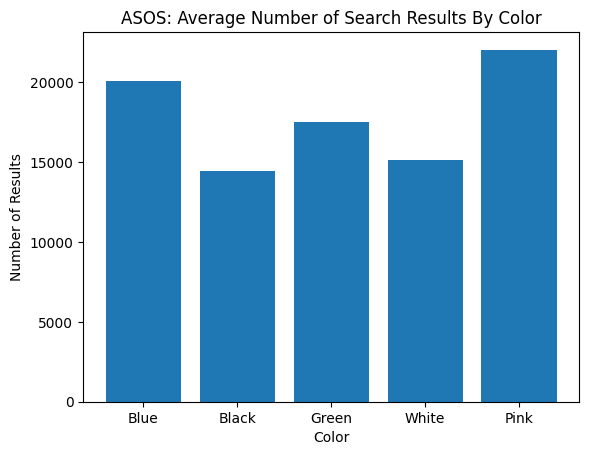

In [16]:
# Plotting the average number of results for each color
colors = ["Blue", "Black", "Green", "White", "Pink"]
results = [blue_mean, black_mean, green_mean, white_mean, pink_mean]
plt.bar(colors, results)
plt.title("ASOS: Average Number of Search Results By Color")
plt.xlabel("Color")
plt.ylabel("Number of Results")

In [17]:
# Create a Data Frame that is a subset of the origin DataFrame, containing only colors of interest
of_interest_scratch = fashion_data[(fashion_data["PrimaryColor"].isin([" Pink", "Blue", " Green", " Black", " White"]))]
of_interest = of_interest_scratch.loc[:,["ProductID", "PrimaryColor"]]
of_interest

,ProductID,PrimaryColor
0,10017413,Black
2,10009781,Pink
3,10015921,Blue
4,10017833,White
6,10017869,Blue
...,...,...
12482,10261845,Green
12484,10265177,Blue
12486,10262843,Black
12488,10261607,Blue


In [18]:
csv_color_grouped = of_interest.groupby(["PrimaryColor"])
csv_colors_agg = csv_color_grouped.agg(["mean", "median", "var", "std", "sem"])
csv_colors_agg

ProductID                                          \
                      mean      median           var           std   
PrimaryColor                                                         
 Black        9.911748e+06  10158165.0  2.162341e+12  1.470490e+06   
 Green        1.001413e+07  10158951.0  1.276297e+12  1.129733e+06   
 Pink         1.009350e+07  10155715.0  4.318845e+11  6.571792e+05   
 White        9.906012e+06  10143877.0  2.131530e+12  1.459976e+06   
Blue          1.005093e+07  10157261.0  9.236371e+11  9.610604e+05   

                            
                       sem  
PrimaryColor                
 Black        36311.167822  
 Green        37491.506375  
 Pink         33234.978819  
 White        49215.785107  
Blue          16378.803357

In [19]:
# Group DataFrame by color and get the number of each color type using .count()
csv_color_count = csv_color_grouped.count()
csv_color_count

,ProductID
PrimaryColor,
Black,1640
Green,908
Pink,391
White,880
Blue,3443


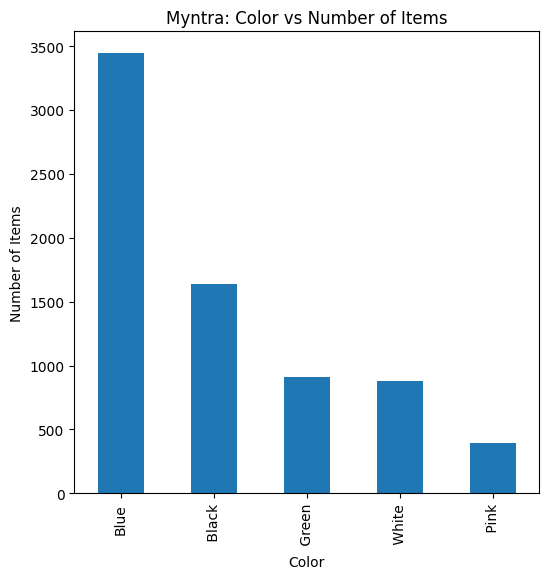

In [20]:
# Plot results
csv_color_sorted = csv_color_count.sort_values("ProductID", ascending = False)
csv_color_graph = csv_color_sorted.plot(kind="bar", y="ProductID", grid=False, figsize=(6,6), xlabel = "Color", ylabel = "Number of Items",title="Myntra: Color vs Number of Items", legend = False)

In [29]:

myntra_pink = int((of_interest["PrimaryColor"] == " Pink").sum())
myntra_blue = int((of_interest["PrimaryColor"] == "Blue").sum())
myntra_green = int((of_interest["PrimaryColor"] == " Green").sum())
myntra_black = int((of_interest["PrimaryColor"] == " Black").sum())
myntra_white = int((of_interest["PrimaryColor"] == " White").sum())

myntra_total = myntra_pink + myntra_blue + myntra_green + myntra_black + myntra_white

In [46]:
myntra_pink_prop = myntra_pink/myntra_total
myntra_blue_prop = myntra_blue/myntra_total
myntra_green_prop = myntra_green/myntra_total
myntra_black_prop = myntra_black/myntra_total
myntra_white_prop = myntra_white/myntra_total

myntra_pink_prop

0.0538419168273203

In [33]:
asos_pink = int(colors_df["Pink"].sum())
asos_blue = int(colors_df["Blue"].sum())
asos_green = int(colors_df["Green"].sum())
asos_black = int(colors_df["Black"].sum())
asos_white = int(colors_df["White"].sum())

asos_total = asos_pink + asos_blue + asos_green + asos_black + asos_white

535627

In [45]:
asos_pink_prop = asos_pink/asos_total
asos_blue_prop = asos_blue/asos_total
asos_green_prop = asos_green/asos_total
asos_black_prop = asos_black/asos_total
asos_white_prop = asos_white/asos_total

asos_pink_prop

0.24703945096120994

In [50]:

pink_expected = (myntra_pink_prop * asos_total)
blue_expected = (myntra_blue_prop * asos_total)
green_expected = (myntra_green_prop * asos_total)
black_expected = (myntra_black_prop * asos_total)
white_expected = (myntra_white_prop * asos_total)

In [51]:
sig = st.chisquare([asos_pink, asos_blue, asos_green, asos_black, asos_white], f_exp=[pink_expected, blue_expected, green_expected, black_expected, white_expected])
sig



Power_divergenceResult(statistic=483085.19216767093, pvalue=0.0)